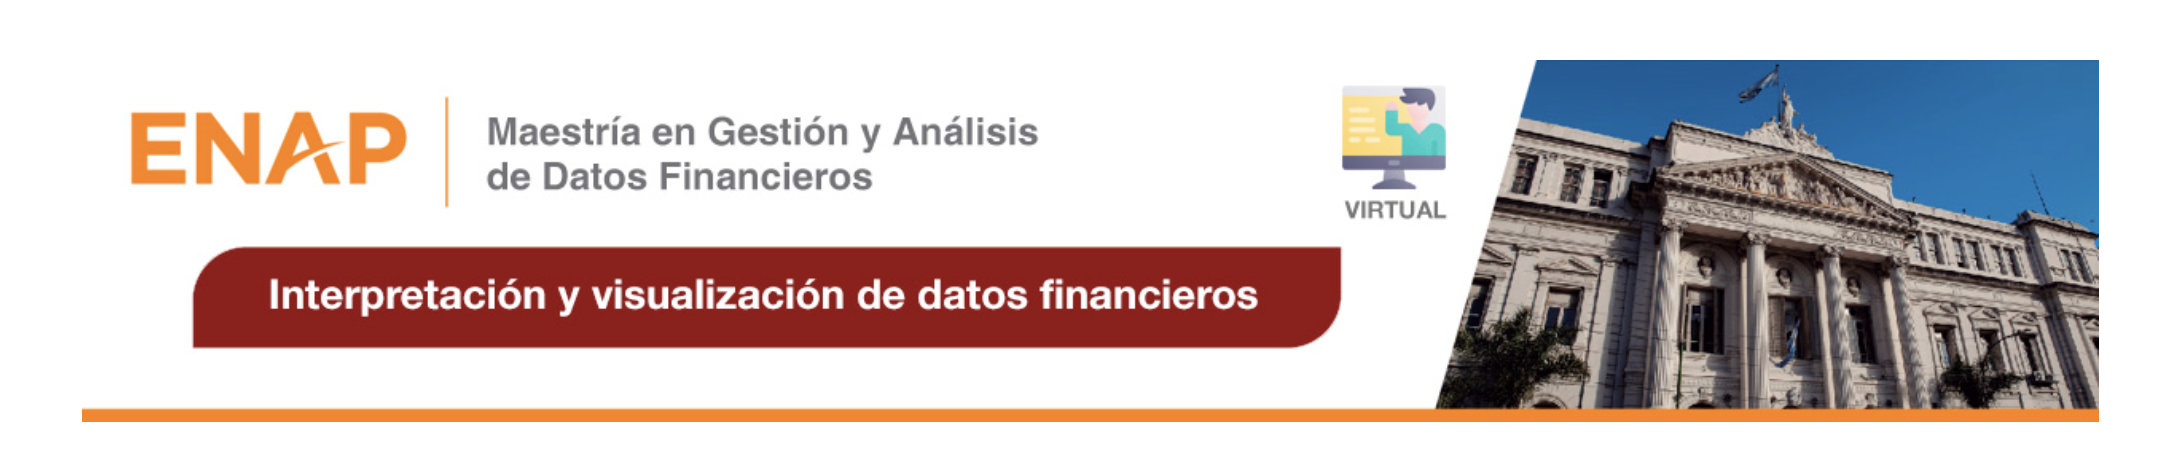

M71V MAESTRÍA EN GESTIÓN Y ANÁLISIS DE DATOS FINANCIEROS
# INTERPRETACIÓN Y VISUALIZACIÓN DE DATOS

Natalia Salaberry

**Actividad Final**

# **Informacion general**



**- Set de datos:**

Se obtienen los siguientes datos:

1. **Gasto en investigacion y desarrollo (%PIB)** extraido del Banco Mundial https://datos.bancomundial.org/indicador/GB.XPD.RSDV.GD.ZS?end=2022&start=2022&view=bar . Se descarga el archivo del link y se sube al drive desde donde se puede observar la informacion.

2. **S&P Global Equity Indices (annual % change)** extraido del sitio del Banco Mundial https://wdi.worldbank.org/table/5.3 . Se descarga el archivo del link y se sube al drive desde donde se puede observar el ultimo año con informacion corrrespondiente al 2022. S&P Global Equity es un conjunto de índices bursátiles diseñado para medir el desempeño de los mercados de acciones a nivel global. Este grupo incluye índices que abarcan diferentes regiones, países y sectores, proporcionando una visión integral del comportamiento de los mercados financieros internacionales.
Los S&P Global Equity Indices miden el cambio de precio del dólar estadounidense en los mercados bursátiles cubiertos por los índices nacionales S&P/IFCI y S&P/Frontier BMI. Los datos que proporciona el Banco Mundial tienen como fuente: Standard & Poor's, Global Stock Markets Factbook y datos complementarios de S&P.

3. Cotizacion del activo **GOOGLE (GOOGL)** para el **Q3 2024** (1 de julio hasta el 30 de septiembre del 2024) extraidos a traves de la API de Yahoo Finance.




**- Objetivo:** El objetivo es poder brindarle al inversor visualizaciones para identificar patrones de precio o movimientos de mercado para la toma de decision de invertir o no en el activo google en funcion de las visualizaciones realizadas.

# **Recoleccion**

## **Gasto en investigacion y desarrollo (%PIB)**

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# URL del archivo: https://docs.google.com/spreadsheets/d/1mJTrEelN8a9wnBxAflrVPu7O4uNfN_RT/edit?usp=sharing&ouid=109766179583368220877&rtpof=true&sd=true
fileDownloaded = drive.CreateFile({'id':'1mJTrEelN8a9wnBxAflrVPu7O4uNfN_RT'})

In [ ]:
# Se descarga el archivo.
fileDownloaded.GetContentFile('PIB.xlsx')

In [ ]:
import pandas as pd
PIB = pd.read_excel("/content/PIB.xlsx")


# Se muestran los primeros registros para verificar que se haya importado correctamente
PIB.head(10)

Country Name Country Code  \
0                   Aruba          ABW   
1                     NaN          AFE   
2              Afganistán          AFG   
3                     NaN          AFW   
4                  Angola          AGO   
5                 Albania          ALB   
6                 Andorra          AND   
7          El mundo árabe          ARB   
8  Emiratos Árabes Unidos          ARE   
9               Argentina          ARG   

                                    Indicator Name     Indicator Code  1960  \
0  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
1  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
2  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
3  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
4  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
5  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
6  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
7  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
8  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   
9  Gasto en investigación y desarrollo (% del PIB)  GB.XPD.RSDV.GD.ZS   NaN   

   1961  1962  1963  1964  1965  ...     2014     2015     2016     2017  \
0   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
1   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
2   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
3   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
4   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN  0.03229      NaN   
5   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
6   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
7   NaN   NaN   NaN   NaN   NaN  ...      NaN      NaN      NaN      NaN   
8   NaN   NaN   NaN   NaN   NaN  ...  0.67523  0.86570  0.93180      NaN   
9   NaN   NaN   NaN   NaN   NaN  ...  0.59396  0.62262  0.55815  0.55631   

      2018     2019      2020      2021  2022  2023  
0      NaN      NaN       NaN       NaN   NaN   NaN  
1      NaN      NaN       NaN       NaN   NaN   NaN  
2      NaN      NaN       NaN       NaN   NaN   NaN  
3      NaN      NaN       NaN       NaN   NaN   NaN  
4      NaN      NaN       NaN       NaN   NaN   NaN  
5      NaN      NaN       NaN       NaN   NaN   NaN  
6      NaN      NaN       NaN       NaN   NaN   NaN  
7      NaN      NaN  0.703443  0.709044   NaN   NaN  
8  1.26389  1.31065  1.488310  1.495250   NaN   NaN  
9  0.48830  0.47813  0.541540  0.517640   NaN   NaN  

[10 rows x 68 columns]

## **S&P Global Equity Indices**

In [ ]:
# URL del archivo: https://drive.google.com/file/d/1WOoU5O5_3oZKsJRjtjG9Vn0NqmOhyULq/view?usp=sharing
fileDownloaded2 = drive.CreateFile({'id':'1WOoU5O5_3oZKsJRjtjG9Vn0NqmOhyULq'})

In [ ]:
# Se descarga el archivo.
fileDownloaded2.GetContentFile('5.3_Stock_markets.csv')

In [ ]:
import pandas as pd

SP = pd.read_csv("/content/5.3_Stock_markets.csv", sep=";")


# Se muestran los primeros registros para verificar que se haya importado correctamente
SP.head(10)

Country  S&P/Global Equity Indices % Change 2022
0          Afghanistan                                      NaN
1              Albania                                      NaN
2              Algeria                                      NaN
3       American Samoa                                      NaN
4              Andorra                                      NaN
5               Angola                                      NaN
6  Antigua and Barbuda                                      NaN
7            Argentina                                    -30.4
8              Armenia                                      NaN
9                Aruba                                      NaN

## **Google Q3 2024**

In [ ]:
#Se cargan las librerías
import yfinance as yf

import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
#Se obtienen los datos del ultimo Q cerrado

Datos_GOOGL = pd.DataFrame(yf.download('GOOGL', start='2024-07-01', end='2024-10-01')).reset_index()
Datos_GOOGL


[*********************100%***********************]  1 of 1 completed


Price        Date   Adj Close       Close        High         Low        Open  \
Ticker                  GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
0      2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1      2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2      2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3      2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4      2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   
..            ...         ...         ...         ...         ...         ...   
59     2024-09-24  162.289993  162.289993  163.220001  160.690002  163.029999   
60     2024-09-25  161.490005  161.490005  162.809998  161.300003  161.470001   
61     2024-09-26  162.729996  162.729996  164.080002  162.279999  163.639999   
62     2024-09-27  163.949997  163.949997  165.699997  162.630005  162.809998   
63     2024-09-30  165.850006  165.850006  166.149994  163.259995  163.320007   

Price     Volume  
Ticker     GOOGL  
0       16006100  
1       17372500  
2       10242100  
3       20967500  
4       21035900  
..           ...  
59      23332100  
60      18869200  
61      20319300  
62      21101300  
63      20413900  

[64 rows x 7 columns]

# **Revision**

In [ ]:
#Se investiga que tipo de datos son las columnas
tipos_datos = PIB.dtypes
tipos_datos

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
Length: 68, dtype: object

In [ ]:
#Se investiga que tipo de datos son las columnas
tipos_datos2 = SP.dtypes
tipos_datos2

Country                                     object
S&P/Global Equity Indices % Change 2022    float64
dtype: object

In [ ]:
#Se investiga que tipo de datos son las columnas
tipos_datos3 = Datos_GOOGL.dtypes
tipos_datos3

Price      Ticker
Date                 datetime64[ns]
Adj Close  GOOGL            float64
Close      GOOGL            float64
High       GOOGL            float64
Low        GOOGL            float64
Open       GOOGL            float64
Volume     GOOGL              int64
dtype: object

# **Transformacion**

###**Modificaciones a los indices**

In [ ]:
#Se pide nombre de las columnas
Datos_GOOGL.columns

MultiIndex([(     'Date',      ''),
            ('Adj Close', 'GOOGL'),
            (    'Close', 'GOOGL'),
            (     'High', 'GOOGL'),
            (      'Low', 'GOOGL'),
            (     'Open', 'GOOGL'),
            (   'Volume', 'GOOGL')],
           names=['Price', 'Ticker'])

In [ ]:
#Convertir las columnas a un índice único utilizando solo el primer nivel
Datos_GOOGL.columns = Datos_GOOGL.columns.get_level_values(0)

In [ ]:
#Se  verifica nombre de las columnas
Datos_GOOGL.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [ ]:
#Se verifica
Datos_GOOGL.head()

Price       Date   Adj Close       Close        High         Low        Open  \
0     2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1     2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2     2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3     2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4     2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   

Price    Volume  
0      16006100  
1      17372500  
2      10242100  
3      20967500  
4      21035900

### **Valores faltantes**

#### **PIB**

In [ ]:
#Se verfica existencia de valores faltantes para el primer set de datos
valores_faltantes = PIB.isnull().sum()
valores_faltantes

Country Name        2
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2019              145
2020              153
2021              165
2022              237
2023              266
Length: 68, dtype: int64

In [ ]:
#Para poder usar datos coyunturales del mismo año tomamos el 2022 para los datos de PIB al igual que para SP Global

# Seleccionar las columnas "Country Name" y el año 2022
PIB_2022 = PIB[["Country Name", 2022]]

# Filtrar filas con valores no nulos y distintos de 0 en la columna 2022
PIB = PIB_2022[(PIB_2022[2022].notna()) & (PIB_2022[2022] != 0)]

# Reiniciar el índice para que quede limpio
PIB.reset_index(drop=True, inplace=True)

# Mostrar los datos filtrados
PIB


Country Name     2022
0                                   Armenia  0.20966
1                                Azerbaiyán  0.15147
2                      Bosnia y Herzegovina  0.18749
3                                   Belarús  0.48064
4                                    Canadá  1.55182
5                                     Congo  0.41490
6                                    Egipto  1.01968
7                                   Georgia  0.23832
8                                 Hong Kong  1.06948
9                                 Kazajstán  0.11974
10                                    Kenya  0.41019
11                               Kirguistán  0.07685
12                                   Kuwait  0.07964
13  Región Administrativa Especial de Macao  0.48627
14                     República de Moldova  0.23122
15                                   México  0.26855
16                      Macedonia del Norte  0.38373
17                                  Myanmar  0.03994
18                                 Mongolia  0.08521
19                                 Mauricio  0.30901
20                                     Omán  0.27506
21                                   Panamá  0.18243
22                                     Perú  0.16435
23                                 Portugal  1.72783
24                      Federación de Rusia  0.93584
25                           Arabia Saudita  0.46335
26                                   Serbia  0.96710
27                                  Ucrania  0.32696
28                               Uzbekistán  0.16022

In [ ]:
# Se verifica el tamaño del df
PIB.shape

(29, 2)

#### **SP**

In [ ]:
#Se verfica existencia de valores faltantes para el segundo set de datos
valores_faltantes2 = SP.isnull().sum()
valores_faltantes2

Country                                      0
S&P/Global Equity Indices % Change 2022    133
dtype: int64

In [ ]:
#Se eliminan los registros de los paises que no contienen datos para el 2022 del SPGlobal
SP.dropna(inplace=True)
SP.head(5)

Country  S&P/Global Equity Indices % Change 2022
7    Argentina                                    -30.4
10   Australia                                    -13.8
11     Austria                                    -25.1
14     Bahrain                                      5.5
15  Bangladesh                                    -25.1

In [ ]:
# Se verifica el tamaño del df
SP.shape

(81, 2)

#### **GOOGLE**

In [ ]:
#Se verfica existencia de valores faltantes para el tercer set de datos
valores_faltantes = Datos_GOOGL.isnull().sum()
valores_faltantes

Price
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
#Se verifica el tamaño del dataset
Datos_GOOGL.shape

(64, 7)

#### **Graficos**

<Axes: >

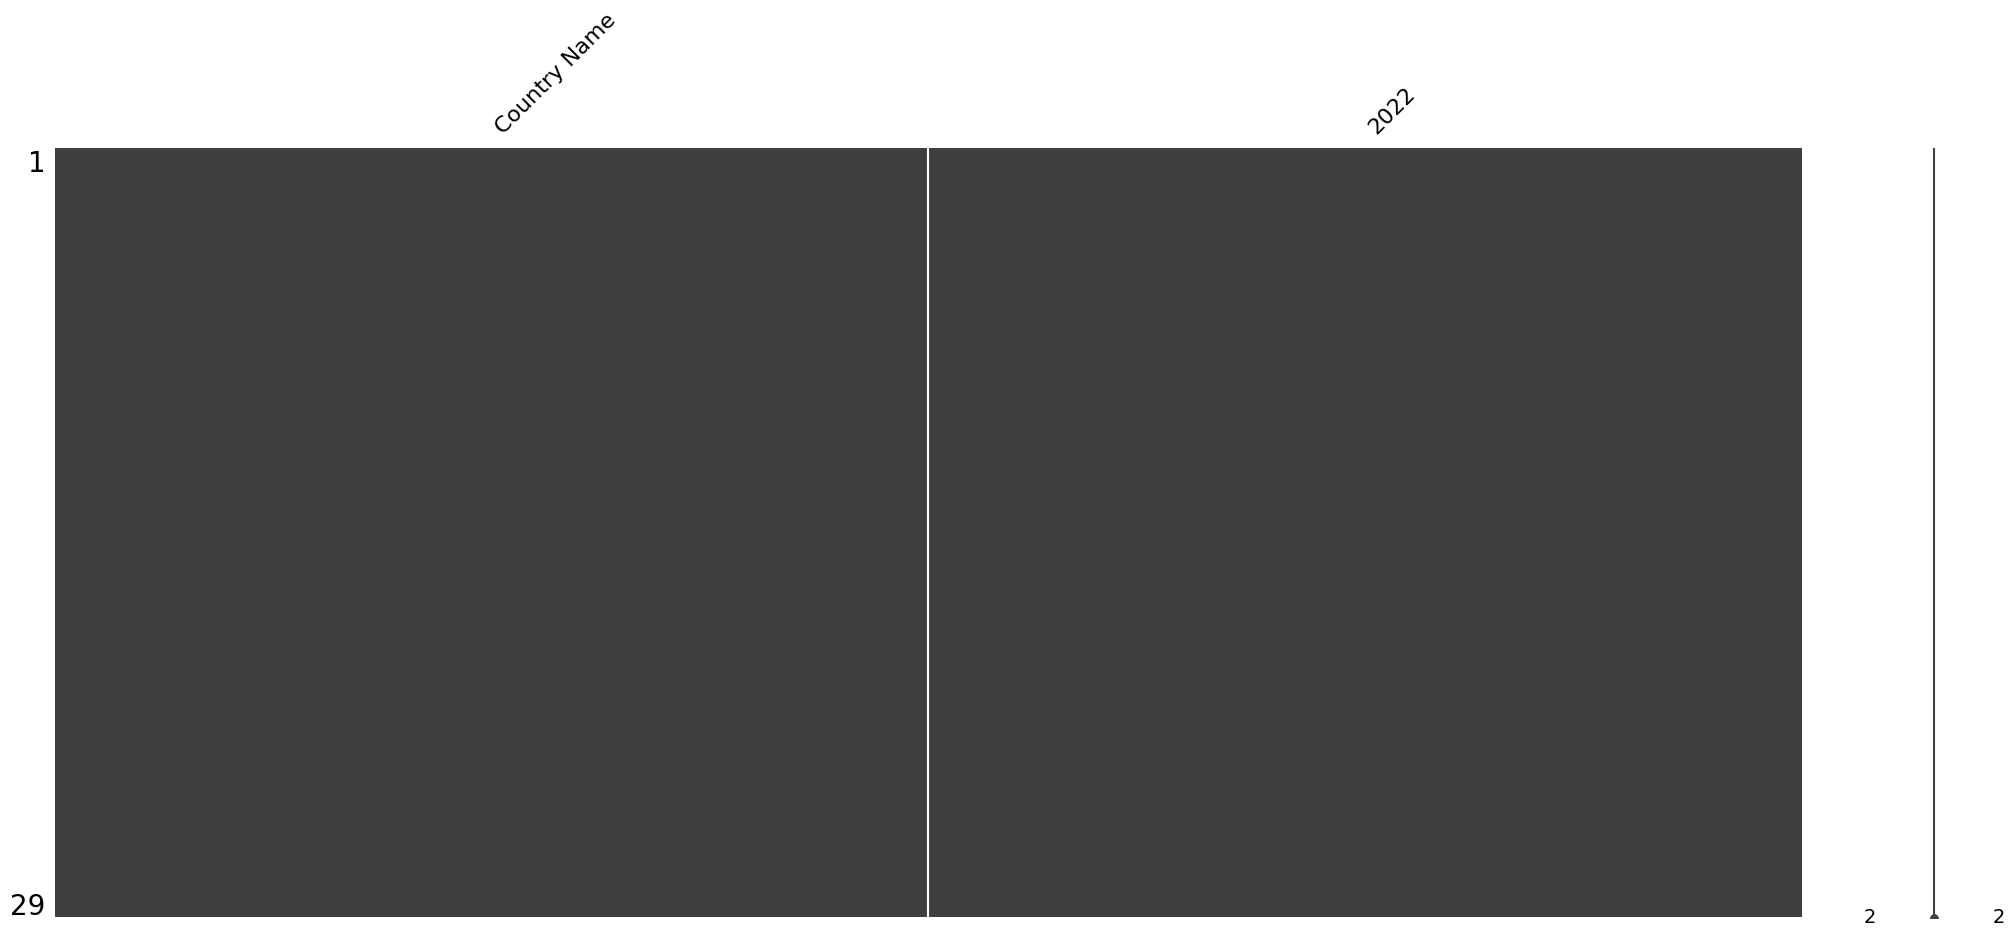

In [ ]:
#Vemos graficamente las variables
!pip install missingno
import missingno as msno

msno.matrix(PIB)

<Axes: >

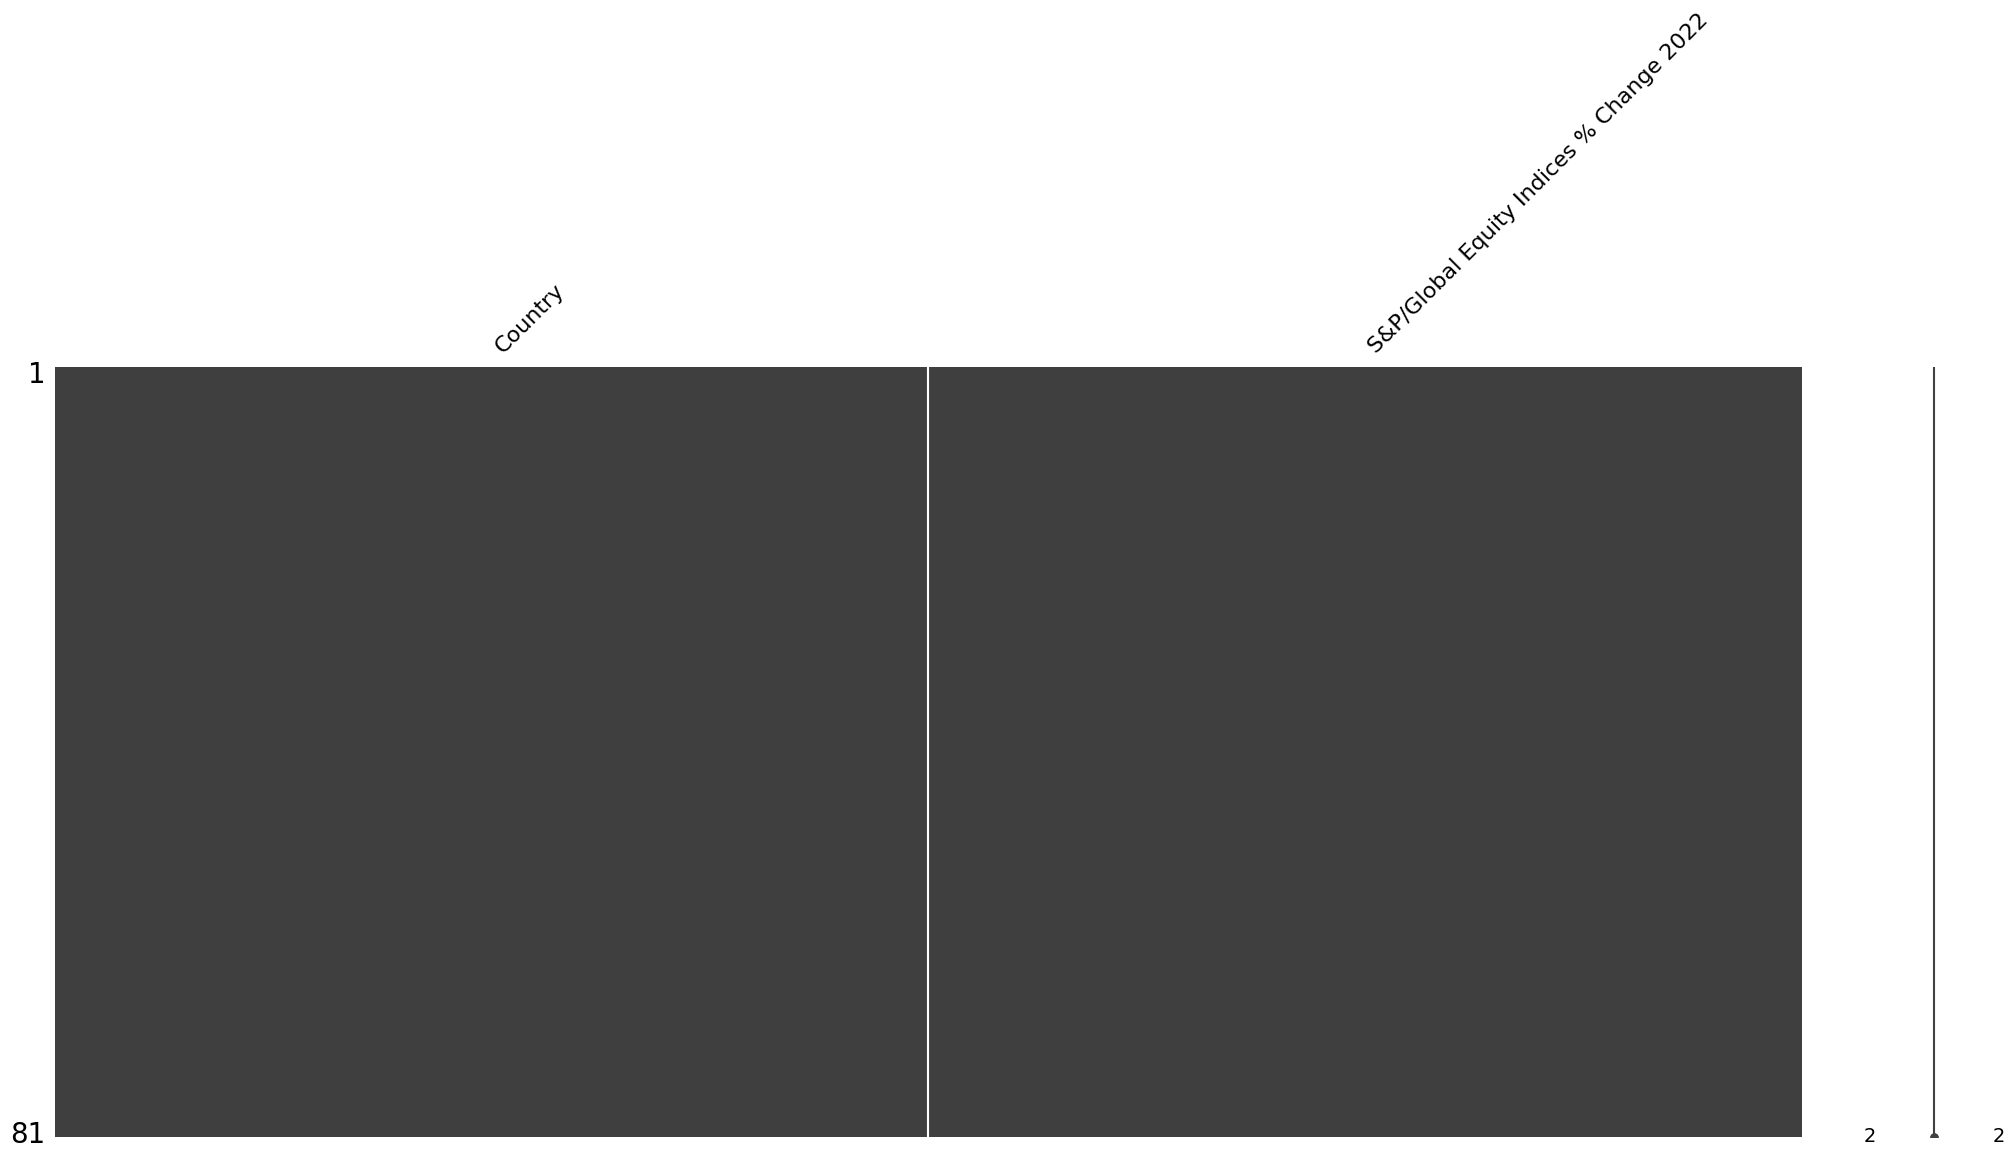

In [ ]:
msno.matrix(SP)

<Axes: >

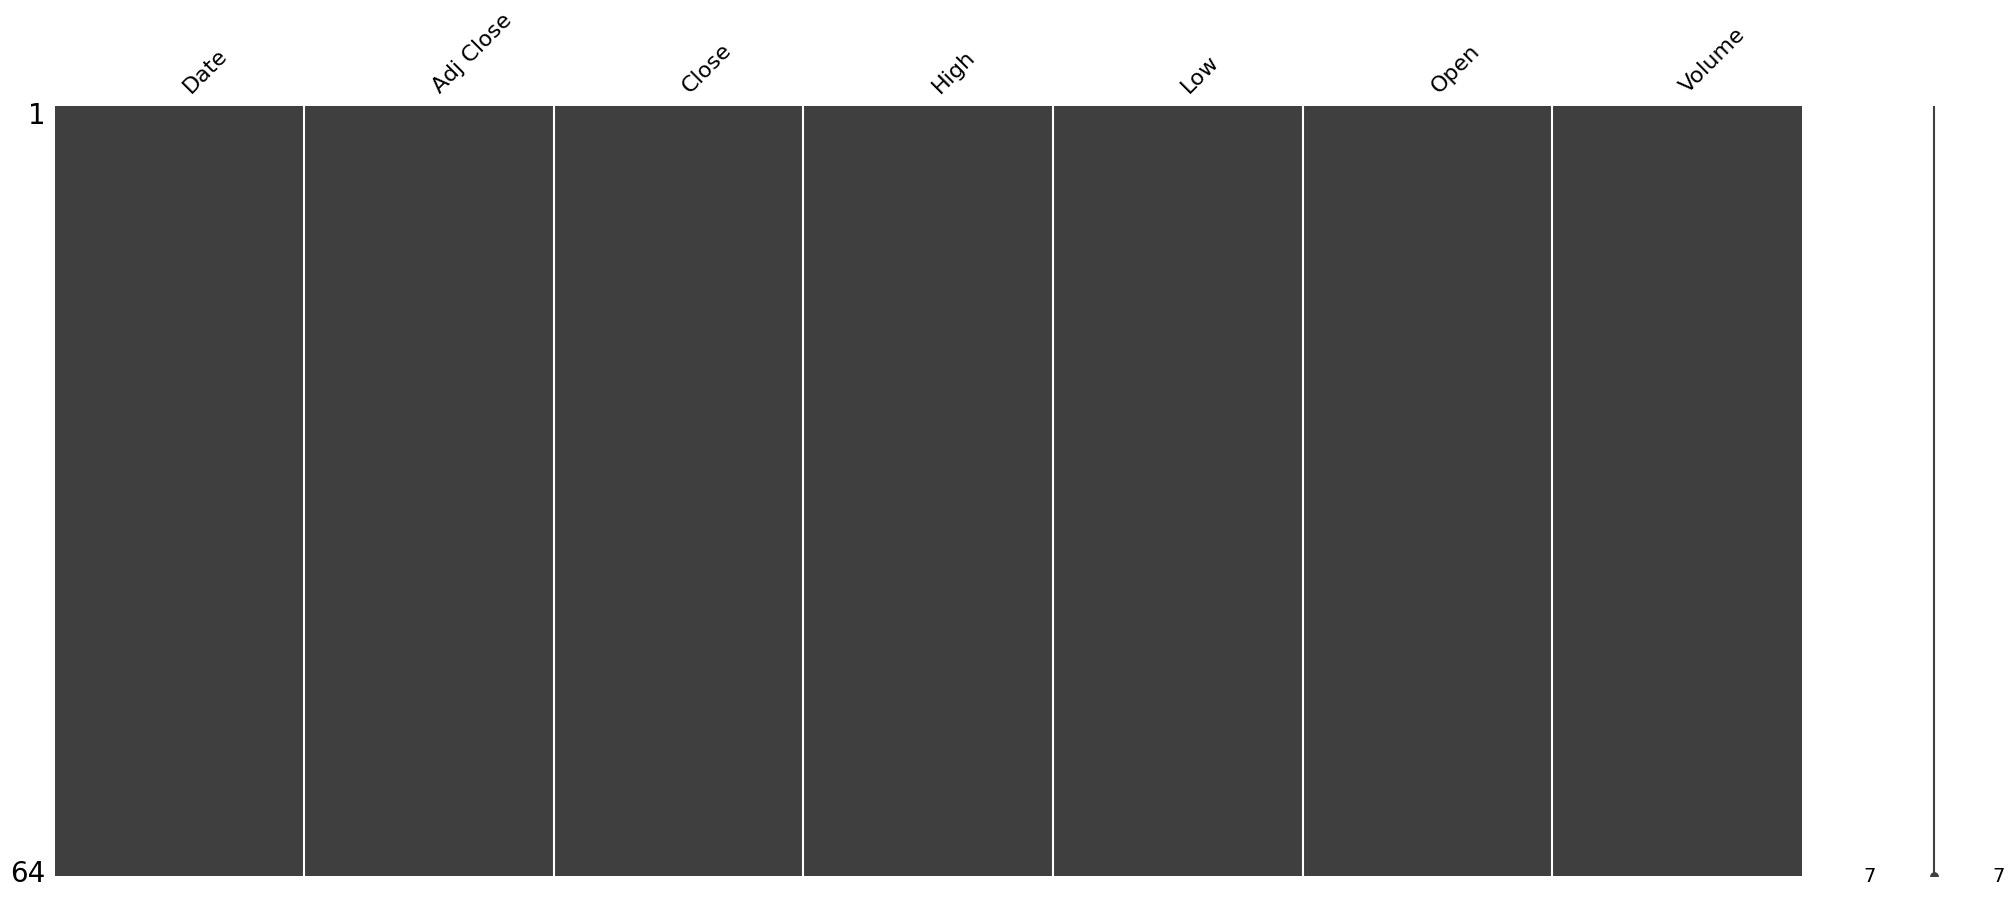

In [ ]:
msno.matrix(Datos_GOOGL)

### **Valores atipicos**

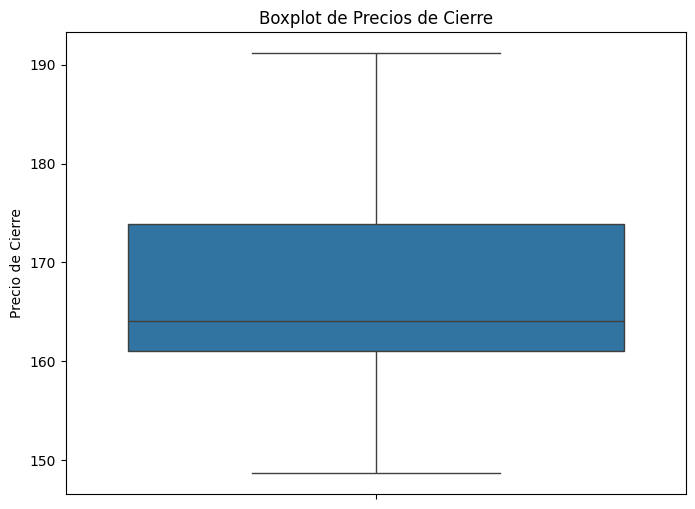

In [ ]:
#Se verifica si hay valores atipicos en los Precios de Cierre
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Crear un Boxplot con Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=Datos_GOOGL, y='Close')

#Mostrar el gráfico
plt.title('Boxplot de Precios de Cierre')
plt.ylabel('Precio de Cierre')
plt.show()

No se observan valores atipicos

### **Nuevas variables**

In [ ]:
#Se crea una nueva variable Precio relativo que permite visualizar cuanto ha cambiado el precio en comparacion con el valor inicial o de referencia.

#Elegir el precio base (el primer 'Adj Close')
precio_base = Datos_GOOGL['Adj Close'].iloc[0]  # Precio ajustado inicial

#Crear una nueva columna para el precio relativo
Datos_GOOGL['Precio Relativo (%)'] = (Datos_GOOGL['Adj Close'] / precio_base) * 100

#Mostrar el DataFrame con el precio relativo
Datos_GOOGL

Price       Date   Adj Close       Close        High         Low        Open  \
0     2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1     2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2     2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3     2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4     2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   
..           ...         ...         ...         ...         ...         ...   
59    2024-09-24  162.289993  162.289993  163.220001  160.690002  163.029999   
60    2024-09-25  161.490005  161.490005  162.809998  161.300003  161.470001   
61    2024-09-26  162.729996  162.729996  164.080002  162.279999  163.639999   
62    2024-09-27  163.949997  163.949997  165.699997  162.630005  162.809998   
63    2024-09-30  165.850006  165.850006  166.149994  163.259995  163.320007   

Price    Volume  Precio Relativo (%)  
0      16006100           100.000000  
1      17372500           101.229570  
2      10242100           101.546532  
3      20967500           104.158697  
4      21035900           103.300719  
..          ...                  ...  
59     23332100            88.805583  
60     18869200            88.367827  
61     20319300            89.046353  
62     21101300            89.713942  
63     20413900            90.753632  

[64 rows x 8 columns]

In [ ]:
#Se crea la variable rango de precio diario que mide la volatilidad diaria
Datos_GOOGL['Rango_Precio'] = Datos_GOOGL['High'] - Datos_GOOGL['Low']
Datos_GOOGL


Price       Date   Adj Close       Close        High         Low        Open  \
0     2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1     2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2     2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3     2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4     2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   
..           ...         ...         ...         ...         ...         ...   
59    2024-09-24  162.289993  162.289993  163.220001  160.690002  163.029999   
60    2024-09-25  161.490005  161.490005  162.809998  161.300003  161.470001   
61    2024-09-26  162.729996  162.729996  164.080002  162.279999  163.639999   
62    2024-09-27  163.949997  163.949997  165.699997  162.630005  162.809998   
63    2024-09-30  165.850006  165.850006  166.149994  163.259995  163.320007   

Price    Volume  Precio Relativo (%)  Rango_Precio  
0      16006100           100.000000      2.580002  
1      17372500           101.229570      4.010010  
2      10242100           101.546532      2.089996  
3      20967500           104.158697      5.059998  
4      21035900           103.300719      2.389999  
..          ...                  ...           ...  
59     23332100            88.805583      2.529999  
60     18869200            88.367827      1.509995  
61     20319300            89.046353      1.800003  
62     21101300            89.713942      3.069992  
63     20413900            90.753632      2.889999  

[64 rows x 9 columns]

In [ ]:
#Se crea la variable cambio porcentual diario que representa el porcentaje de cambio del precio de cierre respecto al dia anterior
Datos_GOOGL['Cambio_Porcentual'] = Datos_GOOGL['Close'].pct_change() * 100
Datos_GOOGL

Price       Date   Adj Close       Close        High         Low        Open  \
0     2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1     2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2     2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3     2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4     2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   
..           ...         ...         ...         ...         ...         ...   
59    2024-09-24  162.289993  162.289993  163.220001  160.690002  163.029999   
60    2024-09-25  161.490005  161.490005  162.809998  161.300003  161.470001   
61    2024-09-26  162.729996  162.729996  164.080002  162.279999  163.639999   
62    2024-09-27  163.949997  163.949997  165.699997  162.630005  162.809998   
63    2024-09-30  165.850006  165.850006  166.149994  163.259995  163.320007   

Price    Volume  Precio Relativo (%)  Rango_Precio  Cambio_Porcentual  
0      16006100           100.000000      2.580002                NaN  
1      17372500           101.229570      4.010010           1.229575  
2      10242100           101.546532      2.089996           0.313108  
3      20967500           104.158697      5.059998           2.572381  
4      21035900           103.300719      2.389999          -0.823718  
..          ...                  ...           ...                ...  
59     23332100            88.805583      2.529999           0.271849  
60     18869200            88.367827      1.509995          -0.492937  
61     20319300            89.046353      1.800003           0.767843  
62     21101300            89.713942      3.069992           0.749709  
63     20413900            90.753632      2.889999           1.158896  

[64 rows x 10 columns]

In [ ]:
#Se crean las medias moviles con el objetivo de suavizar el comportamiento de los precios sobre una ventana de tiempo. Para este caso de 7 y 14 dias.
Datos_GOOGL['SMA_7'] = Datos_GOOGL['Close'].rolling(window=7).mean()
Datos_GOOGL['SMA_14'] = Datos_GOOGL['Close'].rolling(window=14).mean()
Datos_GOOGL.head(20)

Price       Date   Adj Close       Close        High         Low        Open  \
0     2024-07-01  182.747513  182.990005  183.880005  181.300003  183.029999   
1     2024-07-02  184.994522  185.240005  185.570007  181.559998  182.050003   
2     2024-07-03  185.573761  185.820007  186.089996  184.000000  184.850006   
3     2024-07-05  190.347427  190.600006  190.860001  185.800003  185.860001   
4     2024-07-08  188.779495  189.029999  190.169998  187.779999  189.899994   
5     2024-07-09  188.729568  188.979996  191.360001  188.720001  190.309998   
6     2024-07-10  190.926636  191.179993  191.750000  189.029999  189.149994   
7     2024-07-11  185.324097  185.570007  190.860001  185.080002  189.850006   
8     2024-07-12  184.824753  185.070007  187.110001  184.490005  185.080002   
9     2024-07-15  186.282806  186.529999  188.240005  184.919998  184.919998   
10    2024-07-16  183.676270  183.919998  188.679993  183.369995  187.360001   
11    2024-07-17  180.780121  181.020004  183.550003  179.899994  182.970001   
12    2024-07-18  177.454529  177.690002  182.500000  176.470001  181.929993   
13    2024-07-19  177.424576  177.660004  180.289993  177.130005  178.880005   
14    2024-07-22  181.429245  181.669998  182.699997  180.229996  180.589996   
15    2024-07-23  181.549088  181.789993  183.610001  181.539993  182.050003   
16    2024-07-24  172.401230  172.630005  176.190002  171.820007  173.600006   
17    2024-07-25  167.058319  167.279999  173.419998  167.190002  172.520004   
18    2024-07-26  166.778687  167.000000  168.089996  164.059998  167.149994   
19    2024-07-29  169.305344  169.529999  170.429993  167.990005  168.830002   

Price    Volume  Precio Relativo (%)  Rango_Precio  Cambio_Porcentual  \
0      16006100           100.000000      2.580002                NaN   
1      17372500           101.229570      4.010010           1.229575   
2      10242100           101.546532      2.089996           0.313108   
3      20967500           104.158697      5.059998           2.572381   
4      21035900           103.300719      2.389999          -0.823718   
5      15121400           103.273399      2.639999          -0.026452   
6      15952500           104.475641      2.720001           1.164143   
7      25625800           101.409915      5.779999          -2.934400   
8      22898400           101.136672      2.619995          -0.269440   
9      16474000           101.934523      3.320007           0.788886   
10     18290700           100.508219      5.309998          -1.399239   
11     20734100            98.923437      3.650009          -1.576769   
12     25315700            97.103663      6.029999          -1.839577   
13     18881900            97.087273      3.159988          -0.016883   
14     24100300            99.278640      2.470001           2.257117   
15     36352700            99.344218      2.070007           0.066051   
16     49585200            94.338482      4.369995          -5.038775   
17     44852000            91.414825      6.229996          -3.099117   
18     41336900            91.261809      4.029999          -0.167383   
19     20293800            92.644404      2.439987           1.514969   

Price       SMA_7      SMA_14  
0             NaN         NaN  
1             NaN         NaN  
2             NaN         NaN  
3             NaN         NaN  
4             NaN         NaN  
5             NaN         NaN  
6      187.691430         NaN  
7      188.060002         NaN  
8      188.035716         NaN  
9      188.137144         NaN  
10     187.182857         NaN  
11     186.038572         NaN  
12     184.425716         NaN  
13     182.494289  185.092860  
14     181.937145  184.998573  
15     181.468571  184.752144  
16     179.482858  183.810001  
17     177.105715  182.144286  
18     175.102857  180.570715  
19     173.937143  179.181429

In [ ]:
#Se genera un indice de de fuerza relativa (RSI)
#Un valor de RSI por encima de 70 indica que el activo puede estar sobrecomprado (potencial tendencia a bajar), mientras que un valor por debajo de 30 indica que puede estar sobrevendido (potencial tendencia a subir)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss #relacion entre las ganancias promedio y las perdidas promedio en la ventana especificada (por default 14 dias)
    rsi = 100 - (100 / (1 + rs))
    return rsi

Datos_GOOGL['RSI_14'] = calculate_rsi(Datos_GOOGL, 14)


In [ ]:
Datos_GOOGL.head(20)

Price                      Date   Adj Close       Close        High  \
0     2024-07-01 00:00:00+00:00  182.747513  182.990005  183.880005   
1     2024-07-02 00:00:00+00:00  184.994522  185.240005  185.570007   
2     2024-07-03 00:00:00+00:00  185.573761  185.820007  186.089996   
3     2024-07-05 00:00:00+00:00  190.347427  190.600006  190.860001   
4     2024-07-08 00:00:00+00:00  188.779495  189.029999  190.169998   
5     2024-07-09 00:00:00+00:00  188.729568  188.979996  191.360001   
6     2024-07-10 00:00:00+00:00  190.926636  191.179993  191.750000   
7     2024-07-11 00:00:00+00:00  185.324097  185.570007  190.860001   
8     2024-07-12 00:00:00+00:00  184.824753  185.070007  187.110001   
9     2024-07-15 00:00:00+00:00  186.282806  186.529999  188.240005   
10    2024-07-16 00:00:00+00:00  183.676270  183.919998  188.679993   
11    2024-07-17 00:00:00+00:00  180.780121  181.020004  183.550003   
12    2024-07-18 00:00:00+00:00  177.454529  177.690002  182.500000   
13    2024-07-19 00:00:00+00:00  177.424576  177.660004  180.289993   
14    2024-07-22 00:00:00+00:00  181.429245  181.669998  182.699997   
15    2024-07-23 00:00:00+00:00  181.549088  181.789993  183.610001   
16    2024-07-24 00:00:00+00:00  172.401230  172.630005  176.190002   
17    2024-07-25 00:00:00+00:00  167.058319  167.279999  173.419998   
18    2024-07-26 00:00:00+00:00  166.778687  167.000000  168.089996   
19    2024-07-29 00:00:00+00:00  169.305344  169.529999  170.429993   

Price         Low        Open    Volume  Precio Relativo (%)  Rango_Precio  \
0      181.300003  183.029999  16006100           100.000000      2.580002   
1      181.559998  182.050003  17372500           101.229570      4.010010   
2      184.000000  184.850006  10242100           101.546532      2.089996   
3      185.800003  185.860001  20967500           104.158697      5.059998   
4      187.779999  189.899994  21035900           103.300719      2.389999   
5      188.720001  190.309998  15121400           103.273399      2.639999   
6      189.029999  189.149994  15952500           104.475641      2.720001   
7      185.080002  189.850006  25625800           101.409915      5.779999   
8      184.490005  185.080002  22898400           101.136672      2.619995   
9      184.919998  184.919998  16474000           101.934523      3.320007   
10     183.369995  187.360001  18290700           100.508219      5.309998   
11     179.899994  182.970001  20734100            98.923437      3.650009   
12     176.470001  181.929993  25315700            97.103663      6.029999   
13     177.130005  178.880005  18881900            97.087273      3.159988   
14     180.229996  180.589996  24100300            99.278640      2.470001   
15     181.539993  182.050003  36352700            99.344218      2.070007   
16     171.820007  173.600006  49585200            94.338482      4.369995   
17     167.190002  172.520004  44852000            91.414825      6.229996   
18     164.059998  167.149994  41336900            91.261809      4.029999   
19     167.990005  168.830002  20293800            92.644404      2.439987   

Price  Cambio_Porcentual       SMA_7      SMA_14     RSI_14  
0                    NaN         NaN         NaN        NaN  
1               1.229575         NaN         NaN        NaN  
2               0.313108         NaN         NaN        NaN  
3               2.572381         NaN         NaN        NaN  
4              -0.823718         NaN         NaN        NaN  
5              -0.026452         NaN         NaN        NaN  
6               1.164143  187.691430         NaN        NaN  
7              -2.934400  188.060002         NaN        NaN  
8              -0.269440  188.035716         NaN        NaN  
9               0.788886  188.137144         NaN        NaN  
10             -1.399239  187.182857         NaN        NaN  
11             -1.576769  186.038572         NaN        NaN  
12             -1.839577  184.425716         NaN        NaN  
1

# **Exploracion**

### **Analisis descriptivo**

In [ ]:
##Analisis descriptivo de las variables numericas
PIB.describe()

2022
count  29.000000
mean    0.448860
std     0.439117
min     0.039940
25%     0.164350
50%     0.275060
75%     0.480640
max     1.727830

In [ ]:
SP.describe()

S&P/Global Equity Indices % Change 2022
count                                81.000000
mean                                -13.016049
std                                  22.384947
min                                 -62.400000
25%                                 -24.900000
50%                                 -13.800000
75%                                  -5.000000
max                                 105.800000

In [ ]:
#Se quita del analisis a la variable "Date" dado que no aporta informacion en terminos numericos
Datos_GOOGL_0 = Datos_GOOGL.drop(['Date'], axis=1)
Datos_GOOGL_0.describe()

Price   Adj Close       Close        High         Low        Open  \
count   64.000000   64.000000   64.000000   64.000000   64.000000   
mean   167.571123  167.740782  169.770937  166.261251  168.115469   
std     11.064981   11.121282   11.053800   11.125610   10.995174   
min    148.660004  148.660004  151.270004  147.220001  149.919998   
25%    160.854050  161.067501  163.160000  158.945000  161.064999   
50%    163.946228  164.055000  166.059998  163.114998  164.535004   
75%    173.657066  173.887505  177.215000  172.982506  174.920006   
max    190.926636  191.179993  191.750000  189.029999  190.309998   

Price        Volume  Precio Relativo (%)  Rango_Precio  Cambio_Porcentual  \
count  6.400000e+01            64.000000     64.000000          63.000000   
mean   2.514819e+07            91.695433      3.509686          -0.142084   
std    9.576366e+06             6.054792      1.569323           1.670593   
min    1.024210e+07            81.347210      1.509995          -5.038775   
25%    1.882408e+07            88.019830      2.379997          -0.866939   
50%    2.269585e+07            89.711879      3.079994           0.305991   
75%    2.924538e+07            95.025680      4.250004           1.000580   
max    5.363070e+07           104.475641      9.500000           2.572381   

Price       SMA_7      SMA_14     RSI_14  
count   58.000000   51.000000  51.000000  
mean   167.007242  166.014482  41.121945  
std     10.293386    8.709737  16.749724  
min    152.547145  156.071431  16.952220  
25%    161.272855  159.309287  27.834180  
50%    163.971428  163.642857  40.437736  
75%    172.522498  170.190356  49.132962  
max    188.137144  185.092860  88.594599

### **Profiling report**

In [ ]:
#Se hace un profiling report del set de datos de Google
!pip install pandas-profiling
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ce40149b56f9f587a75ecf5e8d4e2829ac5c321cb744bb2c25b920927884b91f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

#Generar el reporte
report = ProfileReport(Datos_GOOGL, title="Profiling Report", explorative=True)
report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

La matriz de correlaciones muestra una alta correlacion positiva entre las variables de origen, a excepcion de la variable volumen que indica tener correlacion muy baja con el resto de las mismas. Con respecto a las variables nuevas creadas al estar compuestas por alguna o algunas de las variables originales presentan gran correlacion con casi todas.
La variable cambiio porcentual es la que posee menor correlacion con el resto de las variables.

# **Visualizaciones**

## **Grafico de lineas**

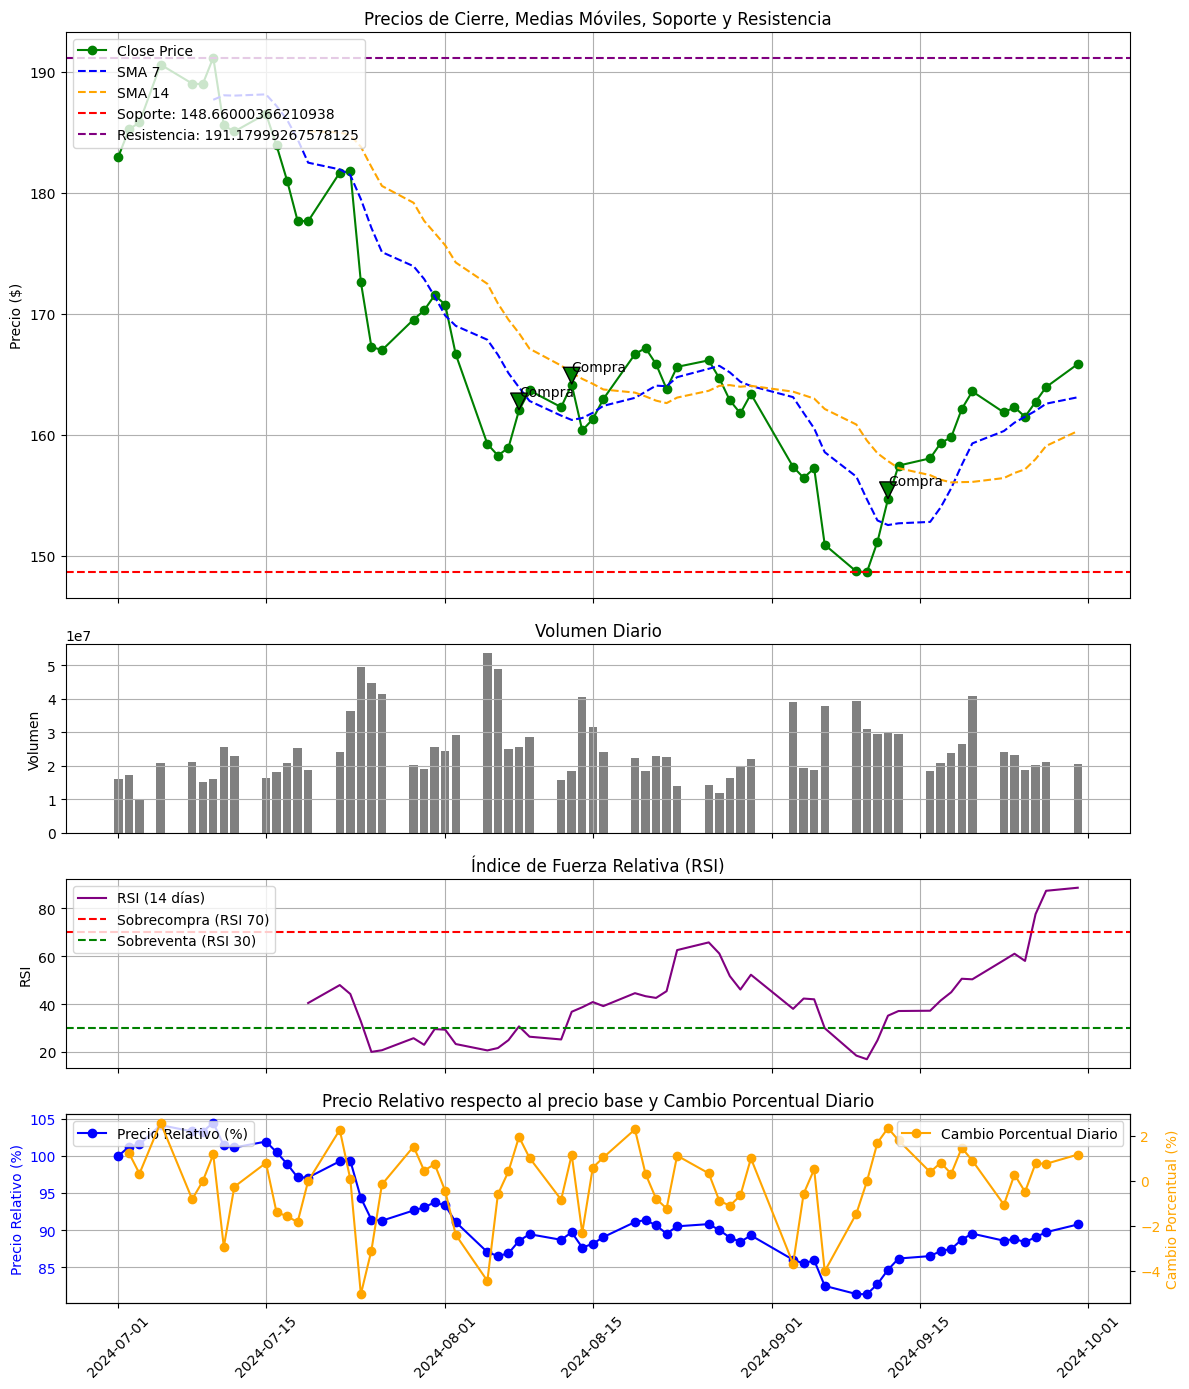

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Se identifican niveles de soporte y resistencia
soporte = Datos_GOOGL['Close'].min()  # Usamos el minimo historico como soporte
resistencia = Datos_GOOGL['Close'].max()  # Usamos el maximo historico como resistencia

#Crear figura y ejes para los graficos, asegurando que compartan el mismo eje X
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [3, 1, 1, 1]}, sharex=True)

# --- Grafico de precios y medias moviles ---
ax1.plot(Datos_GOOGL['Date'], Datos_GOOGL['Close'], label='Close Price', color='green', marker='o')
ax1.plot(Datos_GOOGL['Date'], Datos_GOOGL['SMA_7'], label='SMA 7', color='blue', linestyle='--')
ax1.plot(Datos_GOOGL['Date'], Datos_GOOGL['SMA_14'], label='SMA 14', color='orange', linestyle='--')

#Dibujar líneas horizontales para soporte y resistencia
ax1.axhline(y=soporte, color='red', linestyle='--', label=f'Soporte: {soporte}')
ax1.axhline(y=resistencia, color='purple', linestyle='--', label=f'Resistencia: {resistencia}')

#Añadir leyenda y título
ax1.legend(loc='upper left')
ax1.set_title('Precios de Cierre, Medias Móviles, Soporte y Resistencia')
ax1.set_ylabel('Precio ($)')
ax1.grid(True)

# --- Grafico de volumen ---
ax2.bar(Datos_GOOGL['Date'], Datos_GOOGL['Volume'], label='Volume', color='gray')
ax2.set_title('Volumen Diario')
ax2.set_ylabel('Volumen')
ax2.grid(True)

# --- Grafico de RSI ---
ax3.plot(Datos_GOOGL['Date'], Datos_GOOGL['RSI_14'], label='RSI (14 días)', color='purple')
ax3.axhline(70, color='red', linestyle='--', label='Sobrecompra (RSI 70)')
ax3.axhline(30, color='green', linestyle='--', label='Sobreventa (RSI 30)')
ax3.set_title('Índice de Fuerza Relativa (RSI)')
ax3.set_ylabel('RSI')
ax3.legend(loc='upper left')
ax3.grid(True)

# --- Combinar Precio Relativo y Cambio Porcentual en un solo grafico ---
ax4.plot(Datos_GOOGL['Date'], Datos_GOOGL['Precio Relativo (%)'], label='Precio Relativo (%)', color='blue', marker='o')
ax4.set_ylabel('Precio Relativo (%)', color='blue')
ax4.tick_params(axis='y', labelcolor='blue')

#Crear un segundo eje 'y' para el gráfico de Cambio Porcentual Diario
ax4_2 = ax4.twinx()
ax4_2.plot(Datos_GOOGL['Date'], Datos_GOOGL['Cambio_Porcentual'], label='Cambio Porcentual Diario', color='orange', marker='o')
ax4_2.set_ylabel('Cambio Porcentual (%)', color='orange')
ax4_2.tick_params(axis='y', labelcolor='orange')

#Titulo y leyendas
ax4.set_title('Precio Relativo respecto al precio base y Cambio Porcentual Diario')
ax4.grid(True)

# Añadir leyendas a ambos ejes
ax4.legend(loc='upper left')
ax4_2.legend(loc='upper right')

# --- Señales de compra/venta basadas en el RSI ---
for i in range(1, len(Datos_GOOGL)):
    # Señal de compra: el RSI cruza de debajo de 30 a encima de 30
    if Datos_GOOGL['RSI_14'].iloc[i-1] < 30 and Datos_GOOGL['RSI_14'].iloc[i] > 30:
        ax1.annotate('Compra', (Datos_GOOGL['Date'].iloc[i], Datos_GOOGL['Close'].iloc[i]),
                     xytext=(0,10), textcoords='offset points', arrowprops=dict(facecolor='green', shrink=0.05))

    # Señal de venta: el RSI cruza de encima de 70 a debajo de 70
    elif Datos_GOOGL['RSI_14'].iloc[i-1] > 70 and Datos_GOOGL['RSI_14'].iloc[i] < 70:
        ax1.annotate('Venta', (Datos_GOOGL['Date'].iloc[i], Datos_GOOGL['Close'].iloc[i]),
                     xytext=(0,10), textcoords='offset points', arrowprops=dict(facecolor='red', shrink=0.05))

# Formato de fecha en eje X compartido
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax4.tick_params(axis='x', rotation=45)

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

## **Candlestick**

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subplots con dos gráficos: uno para el candlestick y otro para el RSI
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    row_heights=[0.7, 0.3], vertical_spacing=0.1,
                    subplot_titles=(" "))

# Gráfico de Candlestick
fig.add_trace(go.Candlestick(name='Cotización',
                             x=Datos_GOOGL['Date'],  # Usamos 'Date' en lugar de 'Date_'
                             open=Datos_GOOGL['Open'],  # Usamos 'Open' en lugar de 'Open_GOOGL'
                             high=Datos_GOOGL['High'],  # Usamos 'High' en lugar de 'High_GOOGL'
                             low=Datos_GOOGL['Low'],  # Usamos 'Low' en lugar de 'Low_GOOGL'
                             close=Datos_GOOGL['Close']),  # Usamos 'Close' en lugar de 'Close_GOOGL'
              row=1, col=1)

# Agregar SMA de 7 días
fig.add_trace(go.Scatter(name='SMA 7 días',
                         x=Datos_GOOGL['Date'],  # Usamos 'Date' en lugar de 'Date_'
                         y=Datos_GOOGL['SMA_7'],  # Usamos 'SMA_7' en lugar de 'SMA_7_'
                         line=dict(color='blue', width=1)),  # Definimos la línea con el color azul
              row=1, col=1)

# Agregar SMA de 14 días
fig.add_trace(go.Scatter(name='SMA 14 días',
                         x=Datos_GOOGL['Date'],  # Usamos 'Date' en lugar de 'Date_'
                         y=Datos_GOOGL['SMA_14'],  # Usamos 'SMA_14' en lugar de 'SMA_14_'
                         line=dict(color='orange', width=1)),  # Definimos la línea con el color naranja
              row=1, col=1)

# Gráfico de RSI (en el segundo subplot)
fig.add_trace(go.Scatter(name='RSI 14 días',
                         x=Datos_GOOGL['Date'],  # Usamos 'Date' en lugar de 'Date_'
                         y=Datos_GOOGL['RSI_14'],  # Usamos 'RSI_14' en lugar de 'RSI_14_'
                         line=dict(color='purple', width=2)),  # Definimos la línea con el color morado
              row=2, col=1)

# Agregar líneas de referencia para niveles de sobrecompra y sobreventa en el RSI
fig.add_hline(y=70, line_dash="dash", line_color="red", row=2, col=1, annotation_text="Sobrecompra (70)", annotation_position="top right")
fig.add_hline(y=30, line_dash="dash", line_color="green", row=2, col=1, annotation_text="Sobreventa (30)", annotation_position="bottom right")

# Actualizar el diseño y los formatos
fig.update_layout(dict(xaxis=dict(type='date', tickformat="%Y-%m-%d", nticks=120, tickfont=dict(size=8), tickangle=45)))

# Títulos y ajustes generales
fig.update_layout(title={'text': "Cotización Google con SMA y RSI"},
                  autosize=True, template='plotly_white', xaxis_rangeslider_visible=False,
                  margin=dict(l=50, r=50, t=50, b=50))

# Mostrar el gráfico
fig.show()


## **Gauge**

In [ ]:
import plotly.graph_objects as go

#Se hace un grafico de gauge
fig = go.Figure()

#Con los ultimos valores de 'Adj Close' del Q3 2024
ultimo_valor = Datos_GOOGL['Adj Close'].iloc[-1]
penultimo_valor = Datos_GOOGL['Adj Close'].iloc[-2]

#Se calcula del cambio porcentual del ultimo valor y penultimo valor del dataset
cambio_porcentual = ((ultimo_valor - penultimo_valor) / penultimo_valor) * 100

#Formateo del cambio porcentual
cambio_formateado = f"+{round(cambio_porcentual, 2)}%" if cambio_porcentual >= 0 else f"{round(cambio_porcentual, 2)}%"

#Se usan los ultimos valores de 'Adj Close' para el grafico
fig.add_trace(go.Indicator(
    value=round(ultimo_valor, 20),  #Ultimo valor
    delta={'reference': round(penultimo_valor, 20)},  #Penultimo valor
    gauge={'axis': {'visible': False}},
    domain={'row': 0, 'column': 0}))

fig.update_layout(grid={'rows': 1, 'columns': 1, 'pattern': "independent"},
                  template={'data': {'indicator': [{
                      'title': {'text': "Adj Close Google al cierre Q3 2024"},
                      'mode': "number+delta+gauge",
                      'delta': {'position': "top", 'valueformat': ".2f"}}]
                  }
                  }
                  )

#Se añade el cambio porcentual
fig.add_annotation(
    text=cambio_formateado,
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=20)
)

fig.show()


## **Mapa PBI**

In [ ]:
# Renombrar la columna para asegurarse de que tenga el nombre correcto como cadena
PIB.rename(columns={2022: '2022'}, inplace=True)

<ipython-input-46-febcbd4ab78b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Creación del gráfico
fig = go.Figure(go.Scattergeo(
    locations=PIB["Country Name"],
    locationmode='country names',
    text=PIB['2022'],
    marker=dict(
        size=PIB['2022'] * 100,  # Ajustar el tamaño de los marcadores
        color=PIB['2022'],  # Color basado en el valor del 2022
        colorscale='Viridis',  # Escala de colores
        colorbar=dict(
            title="Investigación y Desarrollo<br>(% del PIB)",  # Título de la barra de colores
            tickprefix="%"  # Prefijo de los valores
        ),
        showscale=True
    )
))

# Configuración del mapa y diseño
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="black"
)
fig.update_layout(
    height=800,
    margin={"r": 20, "t": 40, "l": 20, "b": 20},
    title_text='% PBI Gasto en Investigación y Desarrollo por País (2022)',
    title_x=0.5,
    title_font=dict(size=20)
)

# Mostrar el gráfico
fig.show()

## **Mapa SP**

In [ ]:
# Creación del gráfico
fig = go.Figure(go.Scattergeo(
    locations=SP["Country"],
    locationmode='country names',
    text=SP['S&P/Global Equity Indices % Change 2022'],
    marker=dict(
        size=SP['S&P/Global Equity Indices % Change 2022'].abs() * 2,  # Ajusta el tamaño de los marcadores por el valor absoluto del cambio
        color=SP['S&P/Global Equity Indices % Change 2022'],  # Color basado en el cambio porcentual
        colorscale='RdYlGn',  # Nueva escala de colores de rojo a verde
        colorbar=dict(
            title="Cambio % S&P Global Equity 2022",  # Título de la barra de colores
            tickprefix="%"  # Prefijo de los valores
        ),
        showscale=True
    )
))

# Configuración del mapa y diseño
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="black"
)
fig.update_layout(
    height=800,
    margin={"r": 20, "t": 40, "l": 20, "b": 20},
    title_text='Cambio % Indices S&P Global Equity 2022',
    title_x=0.5,
    title_font=dict(size=20)
)

# Mostrar el gráfico
fig.show()

# **Tablero**

El objetivo es adaptar los graficos previamente realizados para consolidarlos en un unico tablero que proporcione de la mejor manera toda la informacion obtenida.

In [ ]:
pip install dash dash-bootstrap-components plotly pyngrok


In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2orKXmHCCqYkoMH0UNvx7Z5nMH8_78reAstX3iKKN6yUDNwNU")

In [ ]:
url = ngrok.connect(8050)
print(f"Aplicación en ejecución: {url}")

Aplicación en ejecución: NgrokTunnel: "https://4b72-34-139-225-129.ngrok-free.app" -> "http://localhost:8050"


In [ ]:
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
from pyngrok import ngrok
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Inicializar la aplicación Dash
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
server = app.server

# Funciones para crear gráficos

############ Gráfico 1: Mapa %PIB Gasto en Investigacion y Desarrollo #############

def create_pib_chart(PIB):
    # Crear el gráfico de dispersión geográfica
    fig = go.Figure(go.Scattergeo(
        locations=PIB["Country Name"],  # Usar el nombre del país
        locationmode='country names',
        text=PIB['2022'].apply(lambda x: f"{x:.2f}%"),  # Mostrar el valor en porcentaje con 2 decimales
        marker=dict(
            size=PIB['2022'] * 100,  # Ajustar el tamaño de los marcadores en función del valor del porcentaje
            color=PIB['2022'],  # Color basado en el valor del gasto en I+D
            colorscale='Viridis',  # Escala de colores
            colorbar=dict(
                title="Investigación y Desarrollo<br>(% del PIB)",  # Título de la barra de colores
                tickprefix="%"  # Prefijo de los valores en porcentaje
            ),
            showscale=True  # Mostrar la barra de colores
        )
    ))

    # Configuración del mapa
    fig.update_geos(
        visible=True,
        resolution=50,
        showcountries=True,
        countrycolor="black"
    )

    # Configuración del layout
    fig.update_layout(
        height=800,
        margin={"r": 20, "t": 40, "l": 20, "b": 20},
        title_text='% PBI Gasto en Investigación y Desarrollo por País (2022)',  # Título del gráfico
        title_x=0.5,  # Centrar el título
        title_font=dict(size=20)  # Ajustar el tamaño de la fuente del título
    )

    return fig


############ Gráfico 2: Mapa SP Global #############

def create_sp_chart(SP):
    # Crear el gráfico de dispersión geográfica
    fig = go.Figure(go.Scattergeo(
        locations=SP["Country"],  # Usar el nombre del país
        locationmode='country names',
        text=SP['S&P/Global Equity Indices % Change 2022'].apply(lambda x: f"{x:.2f}%"),  # Mostrar el cambio en porcentaje con 2 decimales
        marker=dict(
            size=SP['S&P/Global Equity Indices % Change 2022'].abs() * 2,  # Ajustar el tamaño de los marcadores en función del valor absoluto del cambio
            color=SP['S&P/Global Equity Indices % Change 2022'],  # Color basado en el cambio porcentual
            colorscale='RdYlGn',  # Nueva escala de colores (rojo a verde)
            colorbar=dict(
                title="Cambio % S&P Global Equity 2022",  # Título de la barra de colores
                tickprefix="%"  # Prefijo de los valores en porcentaje
            ),
            showscale=True  # Mostrar la barra de colores
        )
    ))

    # Configuración del mapa
    fig.update_geos(
        visible=True,
        resolution=50,
        showcountries=True,
        countrycolor="black"
    )

    # Configuración del layout
    fig.update_layout(
        height=800,
        margin={"r": 20, "t": 40, "l": 20, "b": 20},
        title_text='Cambio % Índices S&P Global Equity 2022',  # Título del gráfico
        title_x=0.5,  # Centrar el título
        title_font=dict(size=20)  # Ajustar el tamaño de la fuente del título
    )

    return fig



############ Gráfico 3: Precios de Cierre, SMA y Volumen #############
def crear_grafico_lineas(Datos_GOOGL):
    soporte = Datos_GOOGL['Close'].min()
    resistencia = Datos_GOOGL['Close'].max()

    fig = make_subplots(
        rows=3, cols=1, shared_xaxes=True, ##Ajustar aca si se necesita agregar el grafico RSI
        row_heights=[0.4, 0.2, 0.2], ##Aca tambien ajustar el tamaño en la lista
        vertical_spacing=0.05,
        subplot_titles=("Precios de Cierre y SMA", "Volumen", "Precio Relativo y Cambio Porcentual")
    )

    # Precios y SMA
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['Close'], name="Close Price", line=dict(color="green")), row=1, col=1)
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['SMA_7'], name="SMA 7 días", line=dict(color="blue", dash="dash")), row=1, col=1)
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['SMA_14'], name="SMA 14 días", line=dict(color="orange", dash="dash")), row=1, col=1)
    fig.add_hline(y=soporte, line_dash="dash", line_color="red", annotation_text=f"Soporte: {soporte:.2f}", row=1, col=1)
    fig.add_hline(y=resistencia, line_dash="dash", line_color="purple", annotation_text=f"Resistencia: {resistencia:.2f}", row=1, col=1)

    # Volumen
    fig.add_trace(go.Bar(x=Datos_GOOGL['Date'], y=Datos_GOOGL['Volume'], name="Volumen", marker_color="gray"), row=2, col=1)

    # Precio Relativo y Cambio Porcentual
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['Precio Relativo (%)'], name="Precio Relativo (%)", line=dict(color="blue")), row=3, col=1)
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['Cambio_Porcentual'], name="Cambio Porcentual (%)", line=dict(color="orange")), row=3, col=1)

    # RSI
    #fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['RSI_14'], name="RSI (14 días)", line=dict(color="purple")), row=3, col=1)
    #fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Sobrecompra (70)", row=3, col=1)
    #fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Sobreventa (30)", row=3, col=1)


    #Titulo de los graficos
    fig.update_layout(
        height=1200,
        template="plotly_white",
        showlegend=True,
        #margin={"r": 20, "t": 40, "l": 20, "b": 40},
        title_text='Análisis de Cotizaciones - Google Q3 2024',
        title_x=0.5,
        title_font=dict(size=20))

    return fig

############ Gráfico 4: Velas #############
def crear_grafico_velas(Datos_GOOGL):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3])

    # Candlestick
    fig.add_trace(go.Candlestick(
        x=Datos_GOOGL['Date'],
        open=Datos_GOOGL['Open'],
        high=Datos_GOOGL['High'],
        low=Datos_GOOGL['Low'],
        close=Datos_GOOGL['Close'], name="Candlestick"), row=1, col=1)

    # RSI
    fig.add_trace(go.Scatter(x=Datos_GOOGL['Date'], y=Datos_GOOGL['RSI_14'], name="RSI 14 días", line=dict(color="purple")), row=2, col=1)
    fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Sobrecompra (70)", row=2, col=1)
    fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Sobreventa (30)", row=2, col=1)

    fig.update_layout(height=800, template="plotly_white", title="Gráfico de Velas y RSI")
    return fig



    ############ Gráfico 5: Gauge Chart #############
def crear_gauge_chart(Datos_GOOGL):
    ultimo_valor = Datos_GOOGL['Adj Close'].iloc[-1]
    penultimo_valor = Datos_GOOGL['Adj Close'].iloc[-2]
    cambio_porcentual = ((ultimo_valor - penultimo_valor) / penultimo_valor) * 100

    fig = go.Figure(go.Indicator(
        mode="gauge+number+delta",
        value=ultimo_valor,
        delta={"reference": penultimo_valor},
        title={"text": "Precio Ajustado al Cierre Q3 2024"},
        gauge={"axis": {"range": [Datos_GOOGL['Adj Close'].min(), Datos_GOOGL['Adj Close'].max()]}}
    ))
    fig.add_annotation(text=f"Cambio: {cambio_porcentual:.2f}%", x=0.5, y=0.5, showarrow=False, font=dict(size=20))
    return fig

# Layout con tabs
app.layout = dbc.Container([
    dbc.Tabs([
        dbc.Tab(label="Introducción", children=[
            html.Div([
                html.H3([html.Strong("Contexto")]),
                html.P("Este análisis permite a un inversor visualizar movimientos recientes de un activo relacionado a la industria tecnológica, así como también aportar información coyuntural para detectar posibles oportunidades de inversión."),
                html.H3([html.Strong("Objetivo")]),
                html.P("El objetivo de este tablero es visualizar informacion coyuntural como el porcentaje del PIB en Gasto en Investigacion y Desarrollo asi como tambien datos de S&P Global Equity Indices junto con las principales medidas del stock de Google para el período Q3 2024 con el fin de realizar un análisis de comportamiento, identificar patrones de precios o movimientos de mercado para que un inversor pueda tomar una decisión de inversión en función a los datos observados respecto de este activo."),
                html.H3([html.Strong("Obtencion de los datos")]),
                html.P("Para el análisis se extraen datos de diferentes fuentes."),
                html.P("Los datos del porcentaje del PIB en términos del Gasto en Investigación y Desarrollo de los países se obtienen del sitio web del Banco Mundial. Esta variable aporta informacion coyuntural dado que Google opera a nivel mundial y su rendimiento también está correlacionado con las condiciones económicas de los países donde tiene presencia. Esta informacion permite identificar tendencias en las economías donde Google tiene una fuerte participación y donde podría haber oportunidades para que expanda sus servicios o productos, lo que beneficiará a sus ingresos y, en consecuencia, a sus acciones."),
                html.P("Los datos de S&P Global Equity Indices se extraen también del sitio del Banco Mundial. Los S&P Global Equity Indices miden el cambio porcentual de precio del dólar estadounidense en los mercados bursátiles cubiertos por los índices nacionales S&P/IFCI y S&P/Frontier BMI. Los datos que proporciona el Banco Mundial tienen como fuente: Standard & Poor's, Global Stock Markets Factbook y datos complementarios de S&P. El S&P Global Equity Indices es un conjunto de índices bursátiles diseñado para medir el desempeño de los mercados de acciones a nivel global. Este grupo incluye índices que abarcan diferentes regiones, países y sectores, proporcionando una visión integral del comportamiento de los mercados financieros internacionales. Esta variable permite contextualizar dado que los índices sirven como referencia de contexto para analizar cómo Google se comporta en relación con el mercado global ."),
                html.P("Los datos de cotización de la acción Google se obtienen de API de Yahoo Finance."),
                html.P("Al recorrer el tablero se visualizan diferentes solapas que se generan de la manipulacion de los set de datos mencionados con el objetivo de brindar un análisis que permita tomar una decisión de inversión."),

            ])
        ]),

        dbc.Tab(label="Coyuntura", children=[
            dcc.Graph(figure=create_pib_chart(PIB)),
            dcc.Graph(figure=create_sp_chart(SP))

                 ]
        ),

        dbc.Tab(label="Cotizaciones", children=[
            dcc.Graph(figure=crear_grafico_lineas(Datos_GOOGL)),
            dcc.Graph(figure=crear_grafico_velas(Datos_GOOGL)),
            dcc.Graph(figure=crear_gauge_chart(Datos_GOOGL)),


                 ]
        ),

        dbc.Tab(label="Glosario", children=[
            html.Div([
                html.H3([html.Strong("Solapa Coyuntura")]),
                html.P([html.Strong("Grafico 1: % PBI Gasto en Investigación y Desarrollo por País (2022)")]),
                html.Ul([
                    html.Li("% PIB: Porcentaje del PIB en Gasto en Investigacion y Desarrollo por Pais en el 2022."),
                    html.Li("Paises: Paises que registraron datos del porcentaje del PIB en Gasto en Investigacion y Desarrollo durante el año 2022"),
                    ]),
                html.P([html.Strong("Grafico 2: Cambio % Índices S&P Global Equity 2022")]),
                html.Ul([
                     html.Li("S&P: S&P Global Equity son indices que miden el cambio porcentual de precio del dólar estadounidense en los mercados bursátiles cubiertos por los índices nacionales S&P/IFCI y S&P/Frontier BMI correspondiente al año 2022. El S&P Global Equity es un conjunto de índices bursátiles diseñado para medir el desempeño de los mercados de acciones a nivel global. Este grupo incluye índices que abarcan diferentes regiones, países y sectores, proporcionando una visión integral del comportamiento de los mercados financieros internacionales."),
                     html.Li("Paises: Paises que registraron datos de cambio de precio del dólar estadounidense en los mercados bursátiles cubiertos por los índices nacionales S&P/IFCI y S&P/Frontier BMI durante el año 2022"),
                     ])
                ]),  # Aquí cierra el corchete de la lista


            html.H3([html.Strong("Solapa Cotizaciones")]),
             html.P([html.Strong("Grafico 1: Precios de Ciere, SMA, Volumen, Precio Relativo y Cambio Porcentual")]),
                html.Ul([
                    html.Li("Cotización de cierre (Close): es el precio de cierre del día de operación del activo."),
                    html.Li("Media Móvil de 7 días (SMA 7): es un indicador técnico que suaviza las fluctuaciones de los precios a lo largo del tiempo, calculando el promedio de los precios de cierre de los últimos 7 días."),
                    html.Li("Media Móvil de 14 días (SMA 14): es un indicador técnico que suaviza las fluctuaciones de los precios a lo largo del tiempo, calculando el promedio de los precios de cierre de los últimos 14 días."),
                    html.Li("Cotización máxima (High) o Resistencia: es el precio máximo alcanzado del día de operación del activo."),
                    html.Li("Cotización mínima (Low) o Soporte: es el precio mínimo alcanzado del día de operación del activo."),
                    html.Li("Volumen: volumen mide cuántas unidades del activo se compraron y vendieron en un período específico."),
                    html.Li("Precio Relativo: indica cuánto ha cambiado el precio en comparación con el valor inicial o de referencia."),
                    html.Li("Cambio Porcentual: representa el porcentaje de cambio del precio de cierre respecto al día anterior."),

                     ]),

              html.P([html.Strong("Grafico 2: Grafico de Velas y RSI")]),
                  html.Ul([
                    html.Li("Cotización de apertura (Open): es el precio de apertura del día de operación del activo."),
                    html.Li("Cotización máxima (High): es el precio máximo alcanzado del día de operación del activo."),
                    html.Li("Cotización mínima (Low): es el precio mínimo alcanzado del día de operación del activo."),
                    html.Li("Cotización de cierre (Close): es el precio de cierre del día de operación del activo."),
                    html.Li("Índice de Fuerza Relativa de 14 días (RSI 14): es un indicador de impulso que ayuda a saber si una determinada acción está sobrecomprada o sobrevendida. Su valor se encuentra entre 0-100. Si es inferior a 30, significa que está sobrevendido y tiene posibilidades de comprar."),

                    ]),


            html.P([html.Strong("Grafico 3: Precio Ajustado al Cierre Q3 2024")]),
                  html.Ul([
                    html.Li("Cotización de cierre ajustado (Adj Close): es el precio de cierre del día de operación del activo después de los ajustes para todas las divisiones y distribuciones de dividendos aplicables."),

                    ])



                ])
            ]
        ),
    ])


##, fluid=True)


# Publicar con Pyngrok
url = ngrok.connect(8050)
print(f"Aplicación en ejecución: {url}")

# Ejecutar servidor
if __name__ == "__main__":
    app.run_server(port=8050)

Aplicación en ejecución: NgrokTunnel: "https://df94-34-139-225-129.ngrok-free.app" -> "http://localhost:8050"


<IPython.core.display.Javascript object>